# Big-Means: A Simple and Effective Algorithm for Big Data Minimum Sum-of-Squares Clustering

Rustam Mussabayev, Nenad Mladenovic, Ravil Mussabayev, Bassem Jarboui. Big-means: Less is More for K-means Clustering. arXiv preprint arXiv:2204.07485. 14 Apr 2022. pp. 1-40
https://arxiv.org/pdf/2204.07485.pdf

In [1]:
from bigmeans import *
import math
import numpy as np
import matplotlib.pyplot as plt

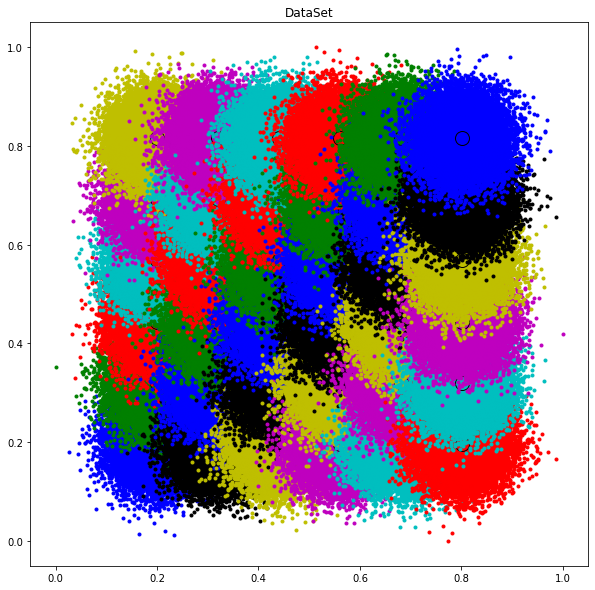

CPU times: user 668 ms, sys: 8.02 ms, total: 676 ms
Wall time: 674 ms


In [2]:
%%time
# Generation of synthetic dataset for clustering
grid_size = 6
n_features = 2
n_entities = 600000
standard_deviation = 0.06
n_candidates = 3
#nb.config.NUMBA_NUM_THREADS = 12 # The number of CPU cores to be used for parallel processing

entities, true_membership, true_centroids = generate_blobs_on_grid(n_entities, grid_size, n_features, standard_deviation)

if n_features == 2:
    draw_dataset(entities, true_centroids, true_membership)
    
n_entities = entities.shape[0]
n_clusters = true_centroids.shape[0]   

In [6]:
%%time

# Parameters of Big-means algorithm
parallel = True
sample_size = 3000
max_n_samples = 100000 # maximum number of samples for clustering
init_mode = 1 # initialization mode (0 - Forgy; 1 - K-means++)
tmax = 10 # time limit (in seconds)
local_max_iters = 300 # maximum number of iterations for K-means local search
local_tol = 0.0001 # relative tolerance for K-means local search
n_candidates = 3 # number of candidates for K-means++ initialization
printing = True # printing the intermediate result output

# Big-means clustering
centroids, objective, membership, n_iter, best_n_iter, best_time, n_dists = big_means_par1(entities, n_clusters, sample_size, max_n_samples, tmax, init_mode, local_max_iters, local_tol, n_candidates, parallel, printing)

print()
print('Final objective:', objective)
print()

objective                     n_iter         cpu_time       
7.525478                      1              0.07           
7.289068                      4              0.11           
7.225538                      5              0.12           
7.198695                      18             0.24           
7.164661                      29             0.35           
7.140426                      37             0.41           
7.111404                      42             0.46           
7.096987                      50             0.54           
7.095059                      64             0.65           
7.026642                      105            1.01           
7.004391                      398            3.65           
6.951809                      654            6.07           

Final objective: 1533.6863240975945

CPU times: user 56.6 s, sys: 439 ms, total: 57.1 s
Wall time: 10 s


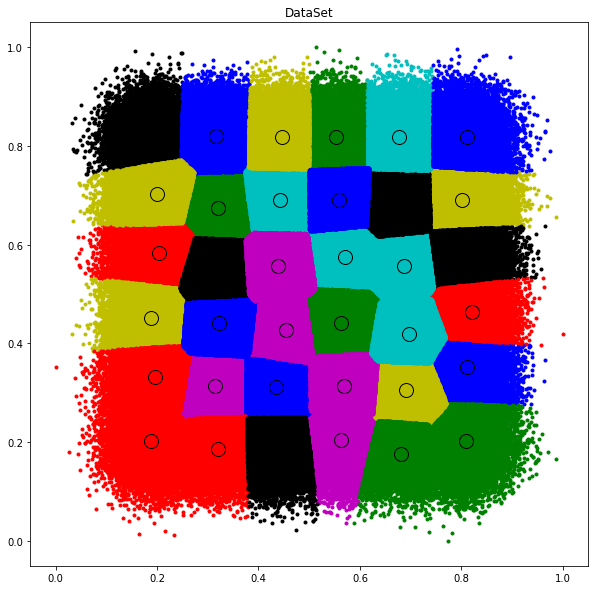

In [7]:
# Visualization of clustering results
draw_dataset(entities, centroids, membership)